In [1]:
import random
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def spiel_mir_das_spiel_der_grossen_zahlen(anzahl_ausfuehrungen):
    absolute_haeufigkeiten = {
        1: 0,
        2: 0,
        3: 0,
        4: 0,
        5: 0,
        6: 0
    }
    for _ in range(anzahl_ausfuehrungen):
        neuer_zufallswurf = random.randint(1, 6)
        absolute_haeufigkeiten[neuer_zufallswurf] += 1
    relative_haeufigkeiten = {k: float(v) / anzahl_ausfuehrungen for k, v in absolute_haeufigkeiten.items()}
    return absolute_haeufigkeiten, relative_haeufigkeiten

Mittelwert absolut:  16666.6666667
Mittelwert relativ: 0.166666666667
Absolute Häufigkeiten:  {1: 16931, 2: 16457, 3: 16714, 4: 16708, 5: 16472, 6: 16718}
Relative Häufigkeiten:  {1: 0.16931, 2: 0.16457, 3: 0.16714, 4: 0.16708, 5: 0.16472, 6: 0.16718}


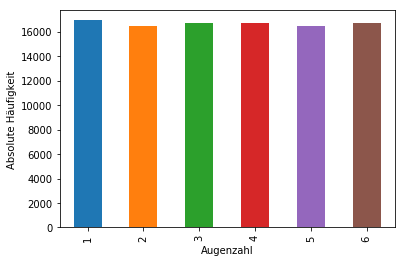

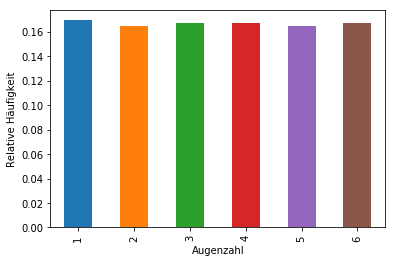

In [3]:
ANZAHL_WUERFE = 100000

absolute_haeufigkeiten, relative_haeufigkeiten = spiel_mir_das_spiel_der_grossen_zahlen(ANZAHL_WUERFE)
print "Mittelwert absolut: ", float(ANZAHL_WUERFE) / 6
print "Mittelwert relativ: {}".format( 1.0 / 6)
print "Absolute Häufigkeiten: ", absolute_haeufigkeiten
print "Relative Häufigkeiten: ", relative_haeufigkeiten
df_absolute_haeufigkeiten =pd.DataFrame({"Augenzahl": absolute_haeufigkeiten.keys(), "Absolute Häufigkeit": absolute_haeufigkeiten.values()})
ax_abs = df_absolute_haeufigkeiten.plot.bar(x="Augenzahl", y="Absolute Häufigkeit", legend=None)
ax_abs.set_xlabel('Augenzahl')
ax_abs.set_ylabel(u'Absolute Häufigkeit')
df_relative_haeufigkeiten =pd.DataFrame({"Augenzahl": relative_haeufigkeiten.keys(), "Relative Häufigkeit": relative_haeufigkeiten.values()})
ax_rel = df_relative_haeufigkeiten.plot.bar(x="Augenzahl", y="Relative Häufigkeit", legend=None)
ax_rel.set_xlabel('Augenzahl')
ax_rel.set_ylabel(u'Relative Häufigkeit')
plt.show()